# Sección 1: Cargar y Preprocesar Datos

## Librerias previas a instalar:

1. pip install tensorflow
2. pip install imblearn


Cargando datos...
Datos cargados: 2878 registros, 3 columnas
Columnas en el DataFrame:
Index(['username', 'timestamp', 'comment'], dtype='object')
Número de registros: 2878
Número de columnas: 3
Columnas en el DataFrame:
Index(['username', 'timestamp', 'comment'], dtype='object')

Primeras 10 filas del DataFrame:


,username,timestamp,comment
0,@MarcoGilerM,2023-09-11T13:37:46.000Z,eso no es todo al realizarse la transferencia ...
1,@JoseAnt40060050,2023-09-01T22:39:33.000Z,nunca entregaste un hospital para la zona sur ...
2,@MariaMa99904828,2023-05-31T00:22:19.000Z,a mas de adefesio sinverguenza charlatan cuand...
3,@patsurfer71,2023-03-30T12:27:34.000Z,jipijapa necesita un hospital general que pued...
4,@Joselui48173725,2023-02-01T13:43:37.000Z,hay jente que tienen caca en el serebropor k v...
5,@juancasaenz76,2023-01-31T18:21:38.000Z,x ej los dos funcionarios atacados a bala en p...
6,@radialvision,2023-01-30T20:57:29.000Z,noticias se trataria de la jueza genny guanol...
7,@mmendozabelen,2023-01-30T19:11:53.000Z,se trataria de la jueza genny guanoluisa delga...
8,@HRZManta,2022-07-08T20:08:41.000Z,este tipo de cirugias se realizan de forma pro...
9,@HRZManta,2022-06-13T16:33:54.000Z,esta unidad mantiene 1096 casos vinculados des...



Estadísticas descriptivas del DataFrame:


,username,timestamp,comment
count,2878,2878,2878
unique,1306,2874,2867
top,@Salud_CZ4,2022-12-15T15:15:06.000Z,peperuales excelente ministro soy especialist...
freq,240,2,3


Columna 'sentimiento' creada a partir de los comentarios.
Limpiando datos...
Columnas disponibles después de limpiar los datos: Index(['username', 'timestamp', 'comment', 'sentimiento', 'comment_limpio',
       'tokens'],
      dtype='object')


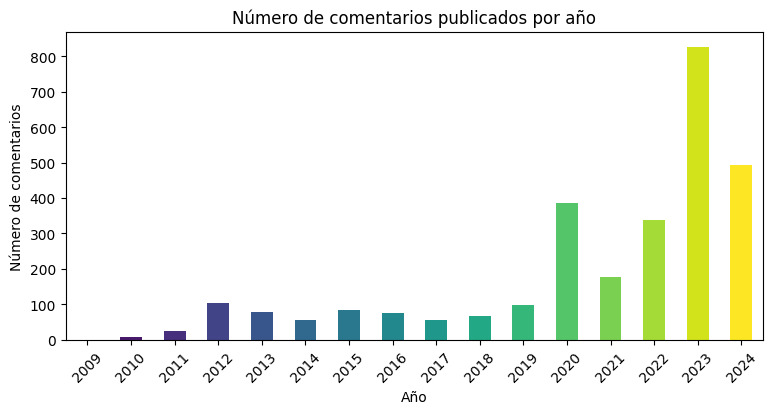

In [43]:
#!pip install tensorflow
# Sección 1: Cargar y Limpiar Datos
import pandas as pd
import numpy as np
import re 
import string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Función para limpiar texto
def limpiar_texto(text):
    text = text.lower()
    text = re.sub(r"[{}]".format(string.punctuation), "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Función para tokenizar texto
def tokenizar_texto(text):
    return text.split()

# Función para visualizar datos
def visualizar_datos(df):
    # Mostrar estadísticas básicas de los datos
    print(f"Número de registros: {df.shape[0]}")
    print(f"Número de columnas: {df.shape[1]}")
    print(f"Columnas en el DataFrame:\n{df.columns}")
    
    # Mostrar las primeras 10 filas del DataFrame en formato de tabla
    print("\nPrimeras 10 filas del DataFrame:")
    display(df.head(10))
    
    # Mostrar estadísticas descriptivas del DataFrame
    print("\nEstadísticas descriptivas del DataFrame:")
    display(df.describe(include='all'))

# Función para visualizar la distribución temporal de los comentarios por año
def visualizar_distribucion_temporal_anual(df):
    df['timestamp'] = pd.to_datetime(df['timestamp']).dt.tz_localize(None)
    df['year'] = df['timestamp'].dt.year
    df_yearly = df.groupby('year').size()
    
    # Crear una paleta de colores
    colores = plt.cm.viridis(np.linspace(0, 1, len(df_yearly)))

    fig, ax = plt.subplots(figsize=(9, 4))
    df_yearly.plot(kind='bar', color=colores, ax=ax)

    ax.set_title('Número de comentarios publicados por año')
    ax.set_xlabel('Año')
    ax.set_ylabel('Número de comentarios')
    plt.xticks(rotation=45)
    plt.show()

# Cargar datos
print("Cargando datos...")
df = pd.read_csv('datasets/datos_combinados_1.csv')
print(f"Datos cargados: {df.shape[0]} registros, {df.shape[1]} columnas")
print(f"Columnas en el DataFrame:\n{df.columns}")

# Visualizar datos
visualizar_datos(df)

# Verificar si la columna 'sentimiento' existe
if 'sentimiento' not in df.columns:
    # Si no existe, agregar una columna 'sentimiento' con valores de ejemplo para la demostración
    # Aquí deberías definir cómo extraer los sentimientos de los datos existentes
    # Por ejemplo, podríamos asumir una función de ejemplo para extraer el sentimiento del comentario
    def extraer_sentimiento(comment):
        positive_terms = ['bueno', 'excelente', 'feliz', 'positivo']
        negative_terms = ['malo', 'horrible', 'triste', 'negativo']
        
        for term in positive_terms:
            if term in comment:
                return 'positivo'
        for term in negative_terms:
            if term in comment:
                return 'negativo'
        return 'neutral'
    
    df['sentimiento'] = df['comment'].apply(extraer_sentimiento)
    print("Columna 'sentimiento' creada a partir de los comentarios.")
else:
    print("Columna 'sentimiento' ya existe en el DataFrame.")

# Limpieza de datos
print("Limpiando datos...")
df['comment_limpio'] = df['comment'].apply(limpiar_texto)
df['tokens'] = df['comment_limpio'].apply(tokenizar_texto)
print(f"Columnas disponibles después de limpiar los datos: {df.columns}")

# Visualizar la distribución temporal de los comentarios por año
visualizar_distribucion_temporal_anual(df)

# SECCION 1.5. Análisis Exploratorio y Preprocesamiento.

[nltk_data] Downloading package stopwords to C:\Users\Erick
[nltk_data]     Carreño\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Algunas stopwords en español: ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']
Columna 'sentimiento' creada a partir de los comentarios.


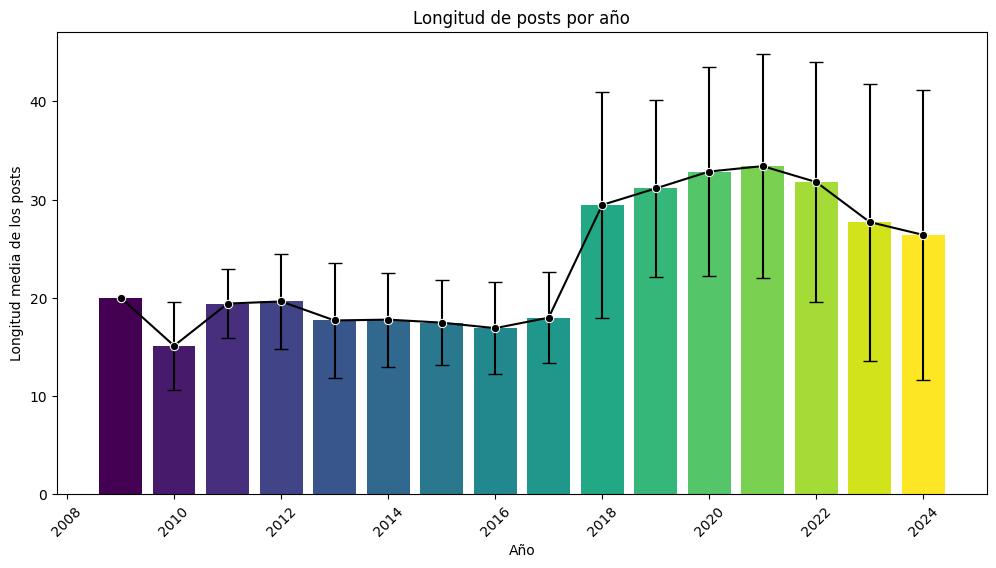

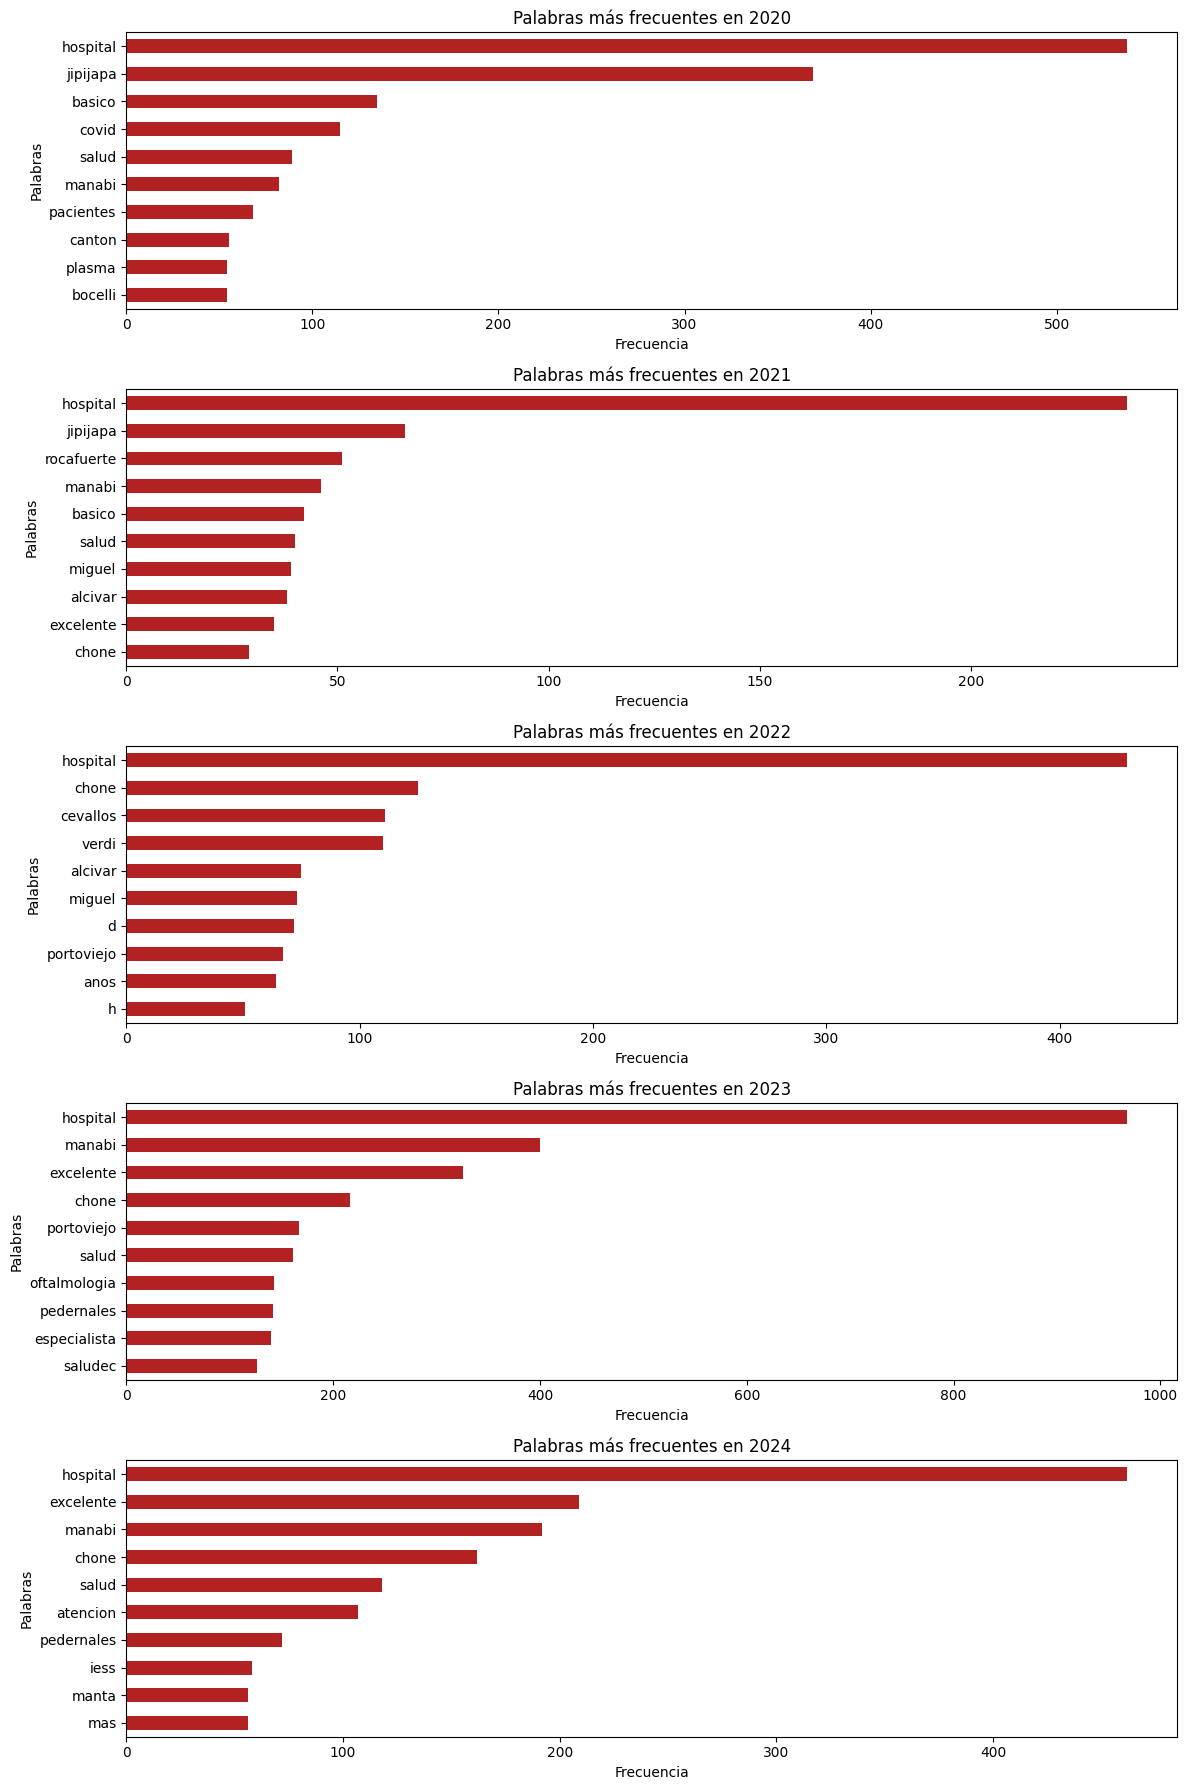

Distribución de clases en el conjunto de entrenamiento: {0: 3, 1: 1957, 2: 754}
Distribución de clases en el conjunto de validación: {0: 1, 1: 420, 2: 161}
Distribución de clases en el conjunto de prueba: {0: 1, 1: 419, 2: 162}
Datos de entrenamiento: (2714, 100)
Datos de validación: (582, 100)
Datos de prueba: (582, 100)


In [44]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import re
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Descargar stopwords de nltk
nltk.download('stopwords')

# Obtener listado de stopwords en español
stop_words = list(stopwords.words('spanish'))
stop_words.extend(["amp", "xa", "xe"])
print("Algunas stopwords en español:", stop_words[:10])

# Función para limpiar texto
def limpiar_texto(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[{}]".format(string.punctuation), "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Función para tokenizar texto
def tokenizar_texto(text):
    return text.split()

# Función para generar datos sintéticos para la clase "positivo"
def generar_datos_sinteticos(df, n_samples):
    positivos = df[df['sentimiento'] == 'positivo']
    datos_sinteticos = positivos.sample(n=n_samples, replace=True)
    return datos_sinteticos

# Función para análisis exploratorio y guardar diccionario de palabras
def analisis_exploratorio(df):
    df_tidy = df.explode(column='tokens')
    df_tidy = df_tidy[~df_tidy["tokens"].isin(stop_words)]
    df_tidy['year'] = df_tidy['timestamp'].dt.year
    word_freq_by_year = df_tidy.groupby(['year', 'tokens']).size().reset_index(name='counts')
    word_dict = {str(year): dict(zip(year_data['tokens'], year_data['counts'])) for year, year_data in word_freq_by_year.groupby('year')}
    with open('word_dict.json', 'w') as json_file:
        json.dump(word_dict, json_file)
    return df_tidy

# Cargar los datos
df = pd.read_csv('datasets/datos_combinados_1.csv')
df['comment_limpio'] = df['comment'].apply(limpiar_texto)
df['tokens'] = df['comment_limpio'].apply(tokenizar_texto)
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.tz_localize(None)

# Verificar si la columna 'sentimiento' existe
if 'sentimiento' not in df.columns:
    def extraer_sentimiento(comment):
        positive_terms = ['bueno', 'excelente', 'feliz', 'positivo']
        negative_terms = ['malo', 'horrible', 'triste', 'negativo']
        
        for term in positive_terms:
            if term in comment:
                return 'positivo'
        for term in negative_terms:
            if term in comment:
                return 'negativo'
        return 'neutral'
    
    df['sentimiento'] = df['comment'].apply(extraer_sentimiento)
    print("Columna 'sentimiento' creada a partir de los comentarios.")
else:
    print("Columna 'sentimiento' ya existe en el DataFrame.")

# Generar datos sintéticos para la clase "positivo"
n_samples_positivos = 1000  # Número de muestras sintéticas a generar
datos_sinteticos = generar_datos_sinteticos(df, n_samples_positivos)
df = pd.concat([df, datos_sinteticos], ignore_index=True)

# Realizar análisis exploratorio
df_tidy = analisis_exploratorio(df)

# Longitud media y desviación de los comentarios por año
df['year'] = df['timestamp'].dt.year
df['comment_length'] = df['comment'].apply(lambda x: len(x.split()))
length_stats_by_year = df.groupby('year')['comment_length'].agg(['mean', 'std'])

fig, ax = plt.subplots(figsize=(12, 6))
colores = plt.cm.viridis(np.linspace(0, 1, len(length_stats_by_year)))
ax.bar(length_stats_by_year.index, length_stats_by_year['mean'], yerr=length_stats_by_year['std'], color=colores, capsize=5)
sns.lineplot(x=length_stats_by_year.index, y=length_stats_by_year['mean'], marker='o', ax=ax, color='black')
ax.set_title('Longitud de posts por año')
ax.set_xlabel('Año')
ax.set_ylabel('Longitud media de los posts')
plt.xticks(rotation=45)
plt.show()

# Visualización de las palabras más frecuentes por año
years_to_plot = [2020, 2021, 2022, 2023, 2024]
fig, axs = plt.subplots(nrows=len(years_to_plot), ncols=1, figsize=(12, 18))
for i, year in enumerate(years_to_plot):
    year_data = df_tidy[df_tidy['year'] == year]
    word_counts = year_data['tokens'].value_counts().head(10)
    word_counts.plot(kind='barh', ax=axs[i], color='firebrick')
    axs[i].invert_yaxis()
    axs[i].set_title(f'Palabras más frecuentes en {year}')
    axs[i].set_xlabel('Frecuencia')
    axs[i].set_ylabel('Palabras')
fig.tight_layout()
plt.show()

# Tokenización y Padding
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['comment_limpio'])
sequences = tokenizer.texts_to_sequences(df['comment_limpio'])
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=max_len)

# Mapeo de etiquetas de las 3 emociones básicas
sentimiento_mapping = {'positivo': 2, 'neutral': 1, 'negativo': 0}
df['sentimiento_mapeado'] = df['sentimiento'].map(sentimiento_mapping)

# Convertir las etiquetas a formato categórico
labels = to_categorical(df['sentimiento_mapeado'])

# Asegurar una distribución equitativa en los conjuntos de datos
def stratified_split(X, y, test_size=0.3, val_size=0.5, random_state=42):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_size, random_state=random_state, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

# División de datos en entrenamiento, validación y prueba con estratificación
X_train, X_val, X_test, y_train, y_val, y_test = stratified_split(data, labels, test_size=0.3, val_size=0.5)

# Verificar distribución de clases en los conjuntos
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print(f"Distribución de clases en el conjunto de entrenamiento: {dict(zip(unique, counts))}")
unique, counts = np.unique(np.argmax(y_val, axis=1), return_counts=True)
print(f"Distribución de clases en el conjunto de validación: {dict(zip(unique, counts))}")
unique, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
print(f"Distribución de clases en el conjunto de prueba: {dict(zip(unique, counts))}")

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de validación: {X_val.shape}")
print(f"Datos de prueba: {X_test.shape}")

# Seccion 1.5.1 Balanceo de Clases con SMOTE.

In [45]:
from imblearn.over_sampling import SMOTE

# Verificar la distribución de clases antes de SMOTE
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print(f"Distribución de clases antes de SMOTE: {dict(zip(unique, counts))}")

# Aplicar SMOTE al conjunto de datos de entrenamiento
print("Aplicando SMOTE para balanceo de clases...")
k_neighbors = min(5, min(counts) - 1)  # Asegurarse de que k_neighbors no sea mayor que el tamaño de la clase minoritaria
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_smote, y_train_smote = smote.fit_resample(X_train, np.argmax(y_train, axis=1))
y_train_smote = to_categorical(y_train_smote)

# Verificar el balance de clases después de SMOTE
unique, counts = np.unique(np.argmax(y_train_smote, axis=1), return_counts=True)
print(f"Distribución de clases después de SMOTE: {dict(zip(unique, counts))}")

Distribución de clases antes de SMOTE: {0: 3, 1: 1957, 2: 754}
Aplicando SMOTE para balanceo de clases...
Distribución de clases después de SMOTE: {0: 1957, 1: 1957, 2: 1957}


# Sección 2: Análisis de Sentimientos con un enfoque lexico.

Primeros 5 términos del lexicón de sentimientos:
    palabra  puntuacion
0     culpa          -2
1    culpar          -2
2    aborda           1
3    abordo           1
4  abandona          -2
Ejemplos de comentarios con sus sentimientos calculados:
                                             comment  sentimiento_calculado
0  eso no es todo al realizarse la transferencia ...                     -2
1  nunca entregaste un hospital para la zona sur ...                      0
2  a mas de adefesio sinverguenza charlatan cuand...                     -1
3  jipijapa necesita un hospital general que pued...                      0
4  hay jente que tienen caca en el serebropor k v...                     -1
Ejemplos de comentarios con sus sentimientos sumados:
                                      username           timestamp  \
0  @ EnContraDeCorruptosDestructoresDeLaPatria 2024-02-28 14:16:20   
1                                   @1120nando 2020-05-06 21:38:28   
2                             

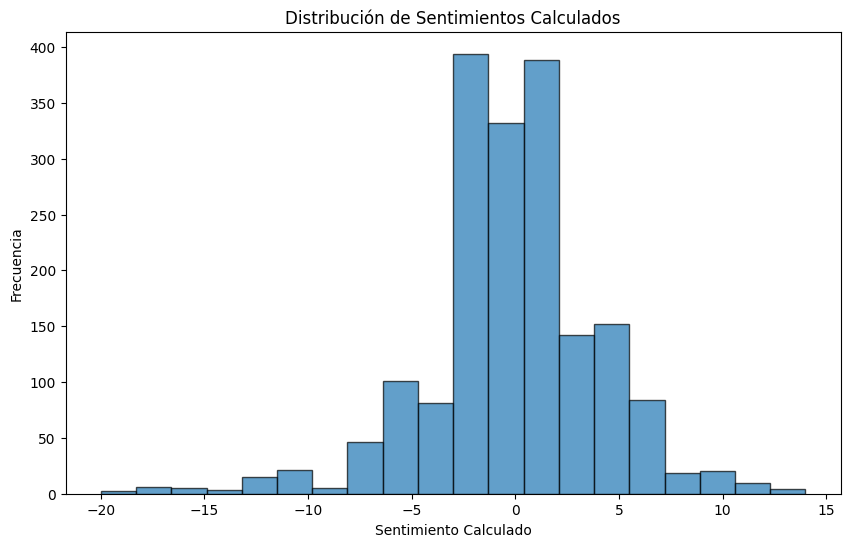

Perfil de Sentimientos de los Comentarios:
Positivos: 44.75%
Neutros  : 4.15%
Negativos: 51.09%


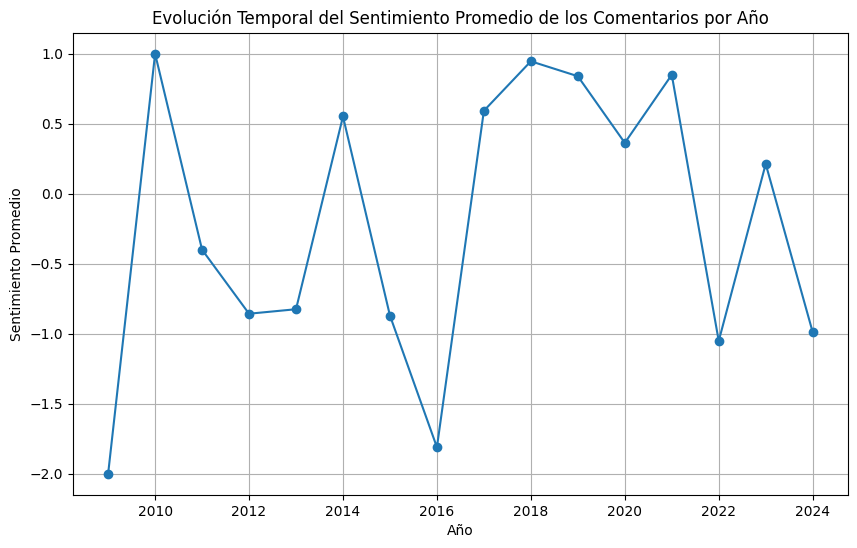

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el lexicón de sentimientos AFINN ajustado
lexicon_path = 'lexico_afinn.csv'
lexicon = pd.read_csv(lexicon_path, usecols=['palabra', 'puntuacion'])
print("Primeros 5 términos del lexicón de sentimientos:")
print(lexicon.head())

# Crear un diccionario a partir del lexicón para acceso rápido
lexicon_dict = dict(zip(lexicon['palabra'], lexicon['puntuacion']))

# Función para limpiar y tokenizar el texto
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    '''
    # Convertir todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[{}]'.format(re.escape(string.punctuation))
    nuevo_texto = re.sub(regex, ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split()
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return nuevo_texto

# Función para calcular el sentimiento de un texto
def calcular_sentimiento(texto):
    tokens = limpiar_tokenizar(texto)
    sentimiento = sum([lexicon_dict.get(token, 0) for token in tokens])
    return sentimiento

# Aplicar la función de sentimiento a los comentarios
df['sentimiento_calculado'] = df['comment_limpio'].apply(calcular_sentimiento)

# Mostrar algunos ejemplos de los comentarios con sus sentimientos calculados
print("Ejemplos de comentarios con sus sentimientos calculados:")
print(df[['comment', 'sentimiento_calculado']].head())

# Crear un DataFrame tidy para los comentarios y sus tokens
df_tidy = df.explode('tokens')

# Sentimiento promedio de cada comentario
tweets_sentimientos = pd.merge(
    left=df_tidy,
    right=lexicon,
    left_on="tokens", 
    right_on="palabra",
    how="inner"
)

tweets_sentimientos = tweets_sentimientos.drop(columns="palabra")

# Se suman los sentimientos de las palabras que forman cada comentario.
tweets_sentimientos = tweets_sentimientos[["username", "timestamp", "comment", "puntuacion"]] \
                      .groupby(["username", "timestamp", "comment"]) \
                      .sum().reset_index()

# Mostrar algunos ejemplos de los comentarios con sus sentimientos sumados
print("Ejemplos de comentarios con sus sentimientos sumados:")
print(tweets_sentimientos.head())

# Visualización de la distribución de sentimientos
plt.figure(figsize=(10, 6))
plt.hist(tweets_sentimientos['puntuacion'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de Sentimientos Calculados')
plt.xlabel('Sentimiento Calculado')
plt.ylabel('Frecuencia')
plt.show()

# Calcular porcentajes de comentarios positivos, negativos y neutros
def perfil_sentimientos(df):
    positivos = round(100 * np.mean(df['puntuacion'] > 0), 2)
    neutros = round(100 * np.mean(df['puntuacion'] == 0), 2)
    negativos = round(100 * np.mean(df['puntuacion'] < 0), 2)
    print(f"Positivos: {positivos}%")
    print(f"Neutros  : {neutros}%")
    print(f"Negativos: {negativos}%")

print("Perfil de Sentimientos de los Comentarios:")
perfil_sentimientos(tweets_sentimientos)

# Convertir la columna 'timestamp' a formato de fecha
tweets_sentimientos['timestamp'] = pd.to_datetime(tweets_sentimientos['timestamp'])

# Agrupar por año y calcular el sentimiento promedio
tweets_sentimientos['year'] = tweets_sentimientos['timestamp'].dt.year
sentimientos_anuales = tweets_sentimientos.groupby('year')['puntuacion'].mean()

# Visualización de la evolución temporal del sentimiento promedio por año
plt.figure(figsize=(10, 6))
plt.plot(sentimientos_anuales.index, sentimientos_anuales.values, marker='o', linestyle='-')
plt.title('Evolución Temporal del Sentimiento Promedio de los Comentarios por Año')
plt.xlabel('Año')
plt.ylabel('Sentimiento Promedio')
plt.grid(True)
plt.show()

# Sección 3: Definición y Entrenamiento del Modelo LSTM.

In [46]:
import numpy as np
import pickle

# Definir parámetros
max_words = 10000
embedding_dim = 300
fasttext_path = 'cc.es.300.vec'
reduced_embedding_path = 'reduced_cc.es.300.vec'

# Tokenizar y preparar los datos
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['comment_limpio'])
sequences = tokenizer.texts_to_sequences(df['comment_limpio'])
text_data = pad_sequences(sequences, maxlen=max_len)

# Crear un conjunto de palabras del corpus
word_index = tokenizer.word_index
words_in_corpus = set(word_index.keys())

# Cargar embeddings preentrenados (FastText) solo para las palabras en el corpus
embedding_index = {}
with open(fasttext_path, encoding='utf-8') as f:
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        if word in words_in_corpus:
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = coefs

# Crear matriz de embeddings reducida
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Guardar la matriz de embeddings en un archivo binario
with open(reduced_embedding_path, 'wb') as f:
    pickle.dump(embedding_matrix, f)

print("Embeddings procesados y guardados en 'reduced_cc.es.300.vec'")

Embeddings procesados y guardados en 'reduced_cc.es.300.vec'


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Attention, GlobalAveragePooling1D, BatchNormalization, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from tqdm.keras import TqdmCallback

# Asegurarnos de que la columna 'sentimiento_calculado' esté presente en el DataFrame
def calcular_sentimiento(texto, lexicon_dict):
    tokens = limpiar_tokenizar(texto)
    return sum([lexicon_dict.get(token, 0) for token in tokens])

# Asumimos que lexicon_dict ya está definido
df['sentimiento_calculado'] = df['comment_limpio'].apply(lambda x: calcular_sentimiento(x, lexicon_dict))

# Definir parámetros
max_words = 10000
max_len = 100
embedding_dim = 300
batch_size = 256  # Aumentado el tamaño del lote
epochs = 10

# Tokenizar y preparar los datos
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['comment_limpio'])
sequences = tokenizer.texts_to_sequences(df['comment_limpio'])
text_data = pad_sequences(sequences, maxlen=max_len)

# Crear secuencias de sentimientos usando el diccionario de léxico
def generar_sentiment_sequences(texto):
    tokens = limpiar_tokenizar(texto)
    return [lexicon_dict.get(token, 0) for token in tokens]

sentiment_sequences = df['comment_limpio'].apply(generar_sentiment_sequences)
sentiment_data = pad_sequences(sentiment_sequences, maxlen=max_len)

# Normalizar la puntuación de sentimiento
scaler = MinMaxScaler()
sentiment_normalizado = scaler.fit_transform(df['sentimiento_calculado'].values.reshape(-1, 1))

# Mapeo de etiquetas de las 3 emociones básicas
sentimiento_mapping = {'positivo': 2, 'neutral': 1, 'negativo': 0}
df['sentimiento_mapeado'] = df['sentimiento'].map(sentimiento_mapping)
labels = to_categorical(df['sentimiento_mapeado'])

# División de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(text_data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# División de datos de sentimiento normalizado en entrenamiento, validación y prueba
sentiment_train, sentiment_temp = train_test_split(sentiment_normalizado, test_size=0.3, random_state=42)
sentiment_val, sentiment_test = train_test_split(sentiment_temp, test_size=0.5, random_state=42)

# Aplicar SMOTE al conjunto de datos de entrenamiento después de la división
print("Aplicando SMOTE para balanceo de clases...")
min_class_samples = min(np.bincount(np.argmax(y_train, axis=1)))
k_neighbors = min(5, min_class_samples - 1)  # Asegurar que k_neighbors <= min_class_samples - 1
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=k_neighbors)
X_train_smote, y_train_smote = smote.fit_resample(X_train, np.argmax(y_train, axis=1))
sentiment_train_smote, _ = smote.fit_resample(sentiment_train, np.argmax(y_train, axis=1))  # Rebalanceo de datos de sentimiento
y_train_smote = to_categorical(y_train_smote)

# Verificar el balance de clases después de SMOTE
unique, counts = np.unique(np.argmax(y_train_smote, axis=1), return_counts=True)
print(f"Distribución de clases después de SMOTE: {dict(zip(unique, counts))}")

# Función para ajustar la tasa de aprendizaje
def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

# Función para construir el modelo LSTM mejorado con léxico y atención
def construir_modelo_avanzado(max_words, max_len, embedding_dim):
    # Input layers
    input_text = Input(shape=(max_len,), name='input_text')
    input_sentiment = Input(shape=(max_len,), name='input_sentiment')
    input_lexical = Input(shape=(1,), name='input_lexical')
    
    # Embedding layer para los comentarios
    embedding_text = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len, name='embedding_text')(input_text)
    
    # Embedding layer para los sentimientos
    embedding_sentiment = Embedding(input_dim=max_words, output_dim=1, input_length=max_len, name='embedding_sentiment')(input_sentiment)
    
    # Concatenar las dos embeddings
    combined_embeddings = Concatenate(name='concatenate_embeddings')([embedding_text, embedding_sentiment])
    
    # LSTM layer
    lstm_out = Bidirectional(LSTM(units=64, return_sequences=True, name='bidirectional_lstm'))(combined_embeddings)
    lstm_out = Dropout(0.3, name='dropout_lstm')(lstm_out)
    
    # Attention mechanism
    attention = Attention(name='attention_layer')([lstm_out, lstm_out])
    attention = GlobalAveragePooling1D(name='global_avg_pool')(attention)
    
    # Red neuronal para los datos léxicos
    lexical_dense = Dense(32, activation='relu', name='dense_lexical')(input_lexical)
    lexical_dense = Dropout(0.3, name='dropout_lexical')(lexical_dense)
    lexical_dense = BatchNormalization(name='batch_norm_lexical')(lexical_dense)
    
    # Concatenar las características combinadas
    combined_features = Concatenate(name='concatenate_features')([attention, lexical_dense])
    combined_features = Dropout(0.3, name='dropout_combined')(combined_features)
    combined_features = Dense(32, activation='relu', name='dense_combined')(combined_features)
    combined_features = Dropout(0.3, name='dropout_final')(combined_features)
    combined_features = BatchNormalization(name='batch_norm_final')(combined_features)
    
    # Output layer
    output = Dense(3, activation='softmax', name='output_layer')(combined_features)
    
    # Model definition
    model = Model(inputs=[input_text, input_sentiment, input_lexical], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Definir el modelo avanzado
model_avanzado = construir_modelo_avanzado(max_words, max_len, embedding_dim)
model_avanzado.summary()

# Entrenamiento del modelo con barra de progreso
history = model_avanzado.fit(
    [X_train_smote, X_train_smote, sentiment_train_smote],
    y_train_smote,
    validation_data=([X_val, X_val, sentiment_val], y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[TqdmCallback(verbose=1), lr_callback]
)

# Guardar el modelo entrenado
model_avanzado.save('modelo_lstm_avanzado.h5')
print("Modelo guardado como 'modelo_lstm_avanzado.h5'")

# Evaluación del modelo
loss, accuracy = model_avanzado.evaluate([X_test, X_test, sentiment_test], y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Aplicando SMOTE para balanceo de clases...
Distribución de clases después de SMOTE: {0: 1955, 1: 1955, 2: 1955}


C:\Users\Erick Carreño\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_text (InputLayer)       │ (None, 100)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_sentiment (InputLayer)  │ (None, 100)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_text (Embedding)    │ (None, 100, 300)          │       3,000,000 │ input_text[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_sentiment           │ (None, 100, 1)            │          10,000 │ input_sentiment[0][0]      │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_embeddings        │ (None, 100, 301)          │               0 │ embedding_text[0][0],      │
│ (Concatenate)                 │                           │                 │ embedding_sentiment[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_11              │ (None, 100, 128)          │         187,392 │ concatenate_embeddings[0]… │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_lexical (InputLayer)    │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_lstm (Dropout)        │ (None, 100, 128)          │               0 │ bidirectional_11[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_lexical (Dense)         │ (None, 32)                │              64 │ input_lexical[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_layer (Attention)   │ (None, 100, 128)          │               0 │ dropout_lstm[0][0],        │
│                               │                           │                 │ dropout_lstm[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_lexical (Dropout)     │ (None, 32)                │               0 │ dense_lexical[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_avg_pool               │ (None, 128)               │               0 │ attention_layer[0][0]      │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_norm_lexical            │ (None, 32)                │             128 │ dropout_lexical[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_features          │ (None, 160)               │               0 │ global_avg_pool[0][0],     │
│ (Concatenate)                 │                           │               

 Total params: 3,202,963 (12.22 MB)

 Trainable params: 3,202,835 (12.22 MB)

 Non-trainable params: 128 (512.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4288 - loss: 1.2436 - val_accuracy: 0.7268 - val_loss: 0.7852 - learning_rate: 0.0010
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 981ms/step - accuracy: 0.6701 - loss: 0.7464 - val_accuracy: 0.8316 - val_loss: 0.4880 - learning_rate: 0.0010
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 988ms/step - accuracy: 0.8759 - loss: 0.3478 - val_accuracy: 0.9313 - val_loss: 0.1847 - learning_rate: 0.0010
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 961ms/step - accuracy: 0.9830 - loss: 0.1002 - val_accuracy: 0.9399 - val_loss: 0.1789 - learning_rate: 0.0010
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 995ms/step - accuracy: 0.9966 - loss: 0.0461 - val_accuracy: 0.9742 - val_loss: 0.0959 - learning_rate: 0.0010
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9987 - loss: 0.0303 - val_accuracy: 0.9588 - val_loss: 0.1376 - learning_rate: 0.0010
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 982ms/step - accuracy: 0.9987 - loss: 0.0252 -

# Seccion 4: Evaluacion del Modelo y Generar Matriz de Confusión.

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Matriz de Confusión:
[[  0   0   0]
 [ 13 381  19]
 [  0   9  10]]


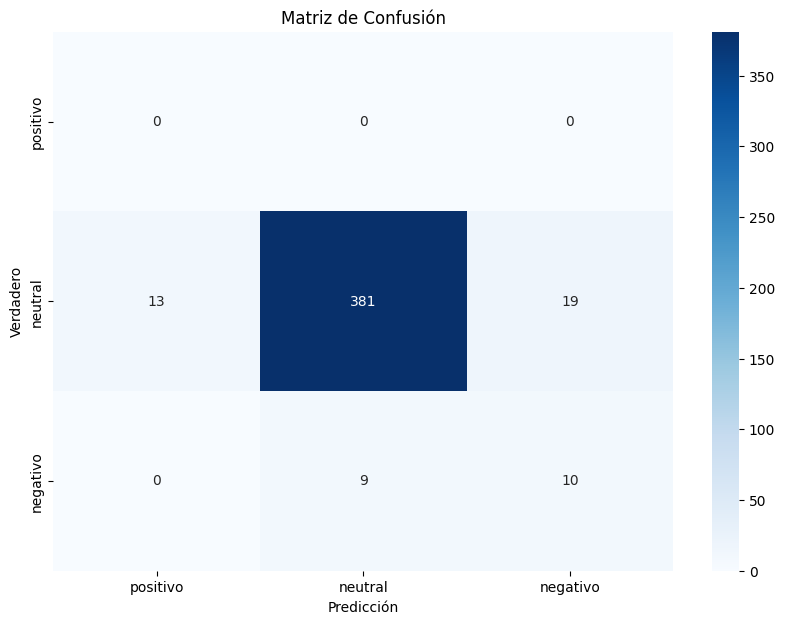

Reporte de Clasificación:
              precision    recall  f1-score   support

    positivo       0.00      0.00      0.00         0
     neutral       0.98      0.92      0.95       413
    negativo       0.34      0.53      0.42        19

    accuracy                           0.91       432
   macro avg       0.44      0.48      0.46       432
weighted avg       0.95      0.91      0.93       432

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8716 - loss: 0.3316
Loss: 0.25221607089042664, Accuracy: 0.9050925970077515
Distribución de clases en el conjunto de prueba: {1: 413, 2: 19}


In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones del modelo
y_pred = model_avanzado.predict([X_test, X_test, sentiment_test])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz de Confusión
cm = confusion_matrix(y_true, y_pred_classes)
print("Matriz de Confusión:")
print(cm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(sentimiento_mapping.keys()), yticklabels=list(sentimiento_mapping.keys()))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# Generar reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=list(sentimiento_mapping.keys()), zero_division=0)
print("Reporte de Clasificación:")
print(report)

# Evaluación del modelo
loss, accuracy = model_avanzado.evaluate([X_test, X_test, sentiment_test], y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Revisar la distribución de clases en el conjunto de prueba
unique, counts = np.unique(y_true, return_counts=True)
print(f"Distribución de clases en el conjunto de prueba: {dict(zip(unique, counts))}")

# Sección 5: Visualización y Resultados

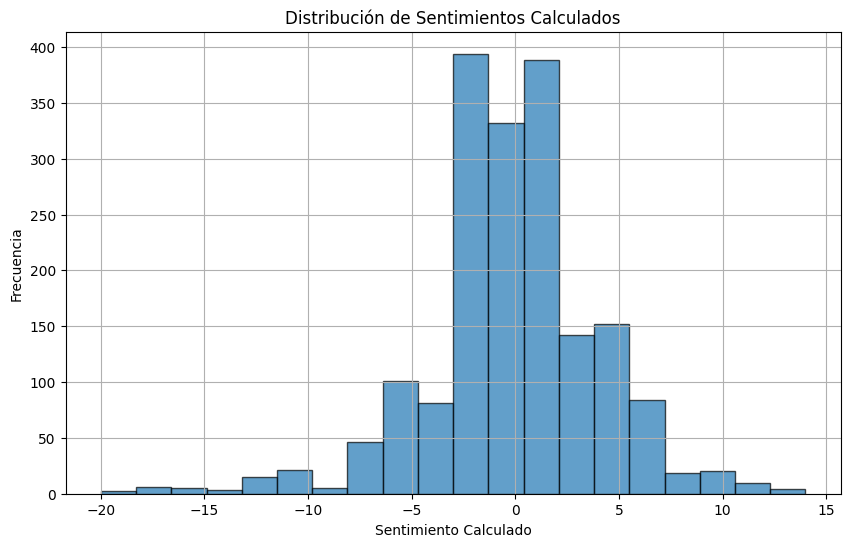

Perfil de Sentimientos de los Comentarios:
Positivos: 44.75%
Neutros  : 4.15%
Negativos: 51.09%


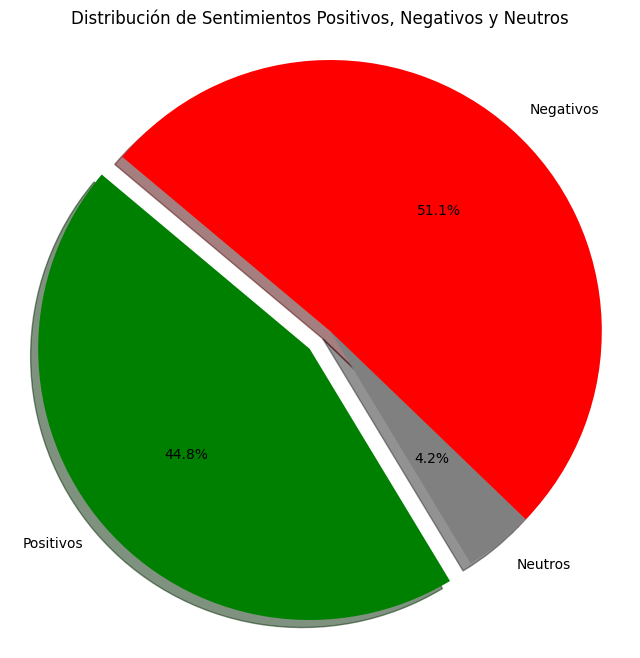

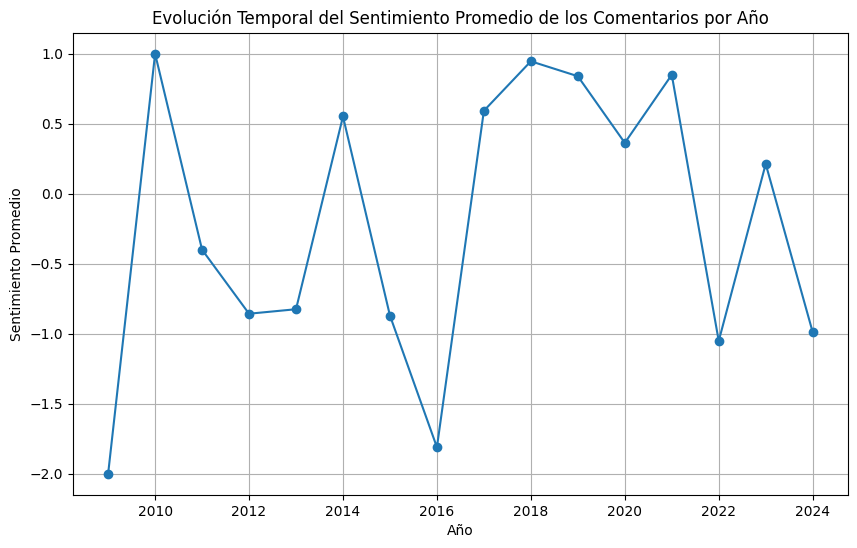

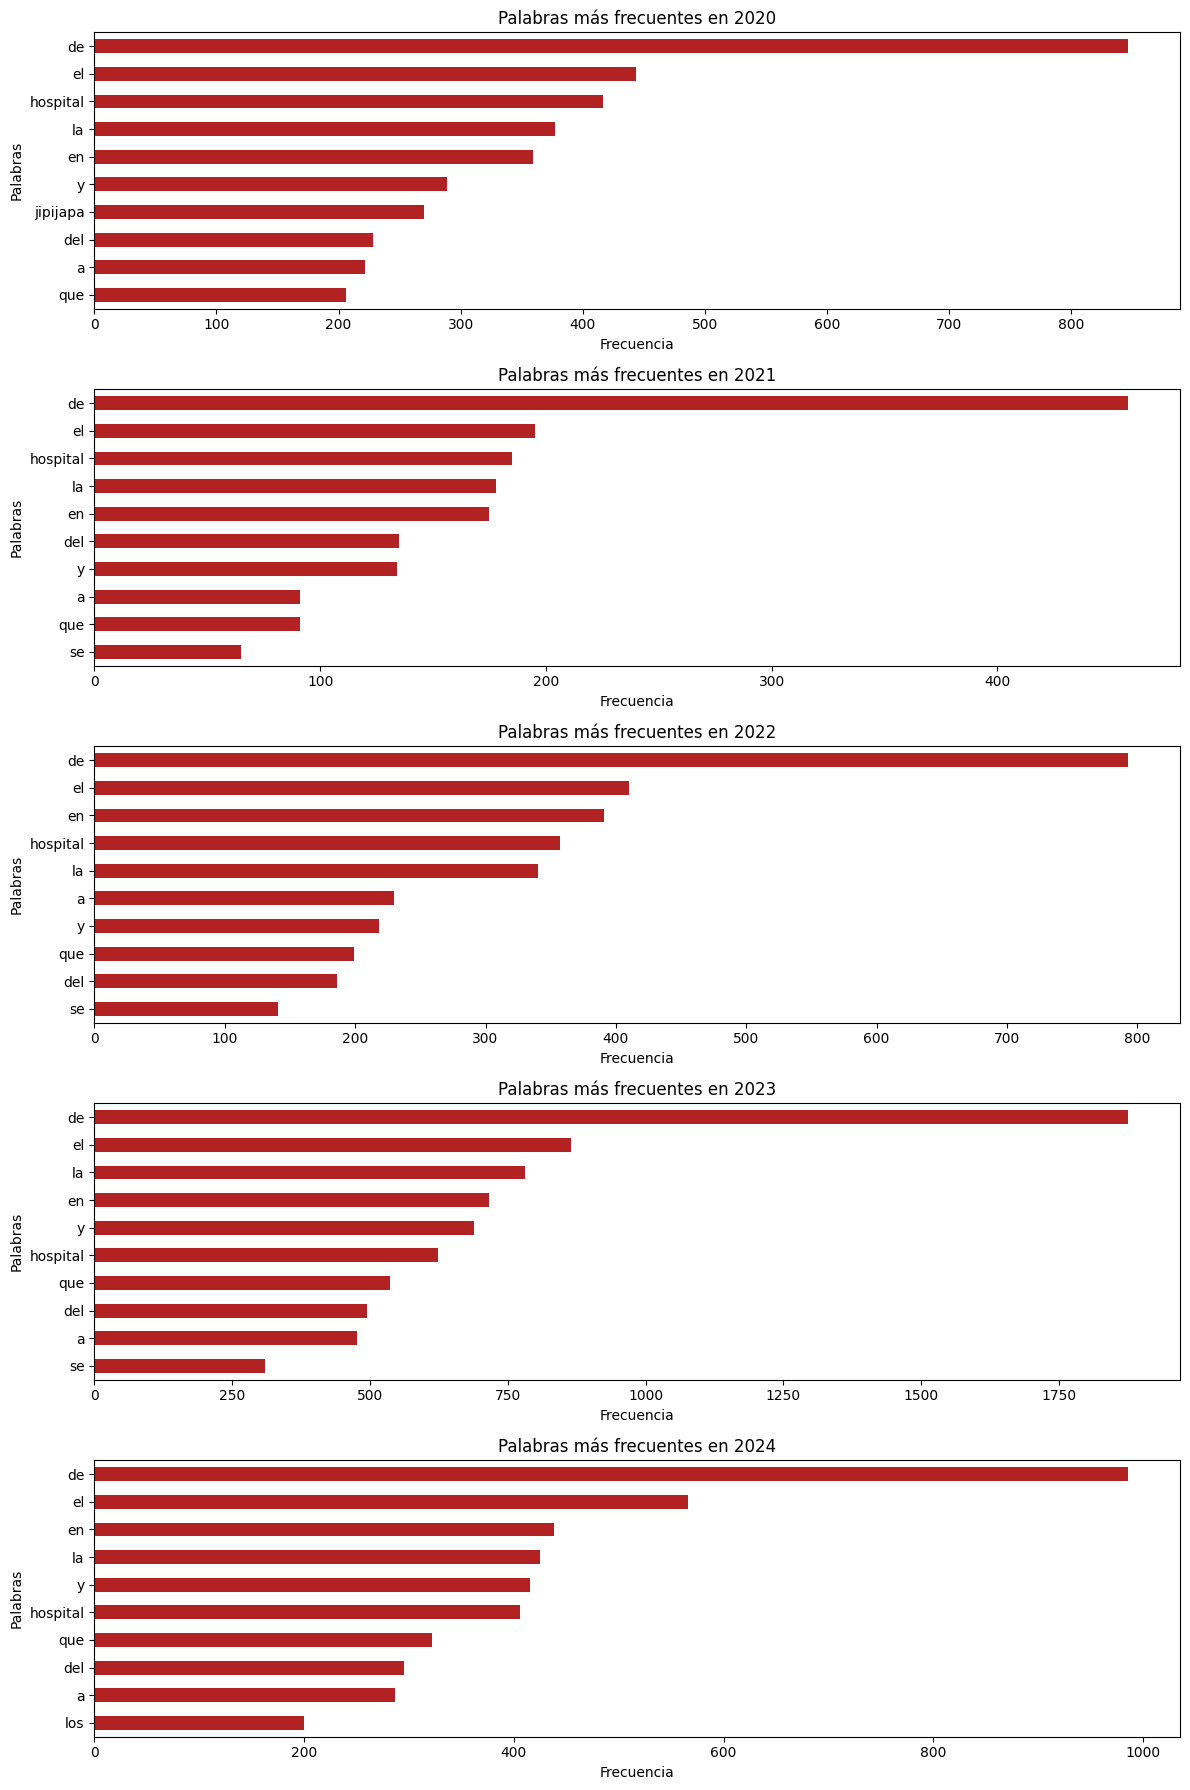

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Función para crear gráficos y visualizar los resultados
def visualizar_resultados(df, tweets_sentimientos, sentimientos_anuales):
    # Visualización de la distribución de sentimientos calculados
    plt.figure(figsize=(10, 6))
    plt.hist(tweets_sentimientos['puntuacion'], bins=20, edgecolor='k', alpha=0.7)
    plt.title('Distribución de Sentimientos Calculados')
    plt.xlabel('Sentimiento Calculado')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    # Perfil de Sentimientos de los Comentarios
    def perfil_sentimientos(df):
        positivos = round(100 * np.mean(df['puntuacion'] > 0), 2)
        neutros = round(100 * np.mean(df['puntuacion'] == 0), 2)
        negativos = round(100 * np.mean(df['puntuacion'] < 0), 2)
        print(f"Positivos: {positivos}%")
        print(f"Neutros  : {neutros}%")
        print(f"Negativos: {negativos}%")
        return positivos, neutros, negativos

    print("Perfil de Sentimientos de los Comentarios:")
    positivos, neutros, negativos = perfil_sentimientos(tweets_sentimientos)

    # Gráfica de distribución de sentimientos positivos, negativos y neutros
    labels = ['Positivos', 'Neutros', 'Negativos']
    sizes = [positivos, neutros, negativos]
    colors = ['green', 'gray', 'red']
    explode = (0.1, 0, 0)  # explode 1st slice

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Distribución de Sentimientos Positivos, Negativos y Neutros')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    # Evolución temporal del sentimiento promedio por año
    plt.figure(figsize=(10, 6))
    plt.plot(sentimientos_anuales.index, sentimientos_anuales.values, marker='o', linestyle='-')
    plt.title('Evolución Temporal del Sentimiento Promedio de los Comentarios por Año')
    plt.xlabel('Año')
    plt.ylabel('Sentimiento Promedio')
    plt.grid(True)
    plt.show()

    # Gráfica de barras para las palabras más frecuentes por año (últimos 5 años)
    years_to_plot = [2020, 2021, 2022, 2023, 2024]
    fig, axs = plt.subplots(nrows=len(years_to_plot), ncols=1, figsize=(12, 18))
    for i, year in enumerate(years_to_plot):
        year_data = df_tidy[df_tidy['year'] == year]
        word_counts = year_data['tokens'].value_counts().head(10)
        word_counts.plot(kind='barh', ax=axs[i], color='firebrick')
        axs[i].invert_yaxis()
        axs[i].set_title(f'Palabras más frecuentes en {year}')
        axs[i].set_xlabel('Frecuencia')
        axs[i].set_ylabel('Palabras')

    fig.tight_layout()
    plt.show()

# Datos y gráficos utilizados en las secciones anteriores
lexicon_path = 'lexico_afinn.csv'
lexicon = pd.read_csv(lexicon_path, usecols=['palabra', 'puntuacion'])

# Crear un diccionario a partir del lexicón para acceso rápido
lexicon_dict = dict(zip(lexicon['palabra'], lexicon['puntuacion']))

# Función para limpiar y tokenizar el texto
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    '''
    # Convertir todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[{}]'.format(re.escape(string.punctuation))
    nuevo_texto = re.sub(regex, ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split()
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return nuevo_texto

# Función para calcular el sentimiento de un texto
def calcular_sentimiento(texto):
    tokens = limpiar_tokenizar(texto)
    sentimiento = sum([lexicon_dict.get(token, 0) for token in tokens])
    return sentimiento

# Aplicar la función de sentimiento a los comentarios
df['sentimiento_calculado'] = df['comment_limpio'].apply(calcular_sentimiento)

# Crear un DataFrame tidy para los comentarios y sus tokens
df_tidy = df.explode('tokens')

# Sentimiento promedio de cada comentario
tweets_sentimientos = pd.merge(
    left=df_tidy,
    right=lexicon,
    left_on="tokens", 
    right_on="palabra",
    how="inner"
)

tweets_sentimientos = tweets_sentimientos.drop(columns="palabra")

# Se suman los sentimientos de las palabras que forman cada comentario.
tweets_sentimientos = tweets_sentimientos[["username", "timestamp", "comment", "puntuacion"]] \
                      .groupby(["username", "timestamp", "comment"]) \
                      .sum().reset_index()

# Convertir la columna 'timestamp' a formato de fecha
tweets_sentimientos['timestamp'] = pd.to_datetime(tweets_sentimientos['timestamp'])

# Agrupar por año y calcular el sentimiento promedio
tweets_sentimientos['year'] = tweets_sentimientos['timestamp'].dt.year
sentimientos_anuales = tweets_sentimientos.groupby('year')['puntuacion'].mean()

# Llamar a la función para visualizar los resultados
visualizar_resultados(df, tweets_sentimientos, sentimientos_anuales)